# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [4]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [5]:
# frequency table for prestige and whether or not someone was admitted
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige  1.0  2.0  3.0  4.0
admit                       
0          28   95   93   55
1          33   53   28   12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [6]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
print dummy_ranks.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0           0.0           0.0           1.0           0.0
1           0.0           0.0           1.0           0.0
2           1.0           0.0           0.0           0.0
3           0.0           0.0           0.0           1.0
4           0.0           0.0           0.0           1.0


#### 2.2 When modeling our class variables, how many do we need? 



Answer: three.  There are four categories, and schools can only belong to one category.  So knowing whether a school belongs in the first three categories is sufficient to know whether it fits in the fourth.


## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [7]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
print handCalc.head()


   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           0.0           1.0           0.0
1      1  660.0  3.67           0.0           0.0           1.0           0.0
2      1  800.0  4.00           1.0           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           0.0           1.0


In [8]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
print pd.crosstab(handCalc['admit'], handCalc['prestige_1.0'], rownames=['admit'])

prestige_1.0  0.0  1.0
admit                 
0             243   28
1              93   33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [9]:
# ODDS 
33/28.0

1.1785714285714286

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [10]:
93/243.0

0.38271604938271603

#### 3.3 Calculate the odds ratio

In [11]:
# odds ratio - odds of exposed group (i.e. people who did go to #1 college) divided by odds of 
# non-exposed group (i.e. people who did not go to #1 college)

(33/28.0) / (93/243.0)

3.079493087557604

#### 3.4 Write this finding in a sentenance: 

Answer:  People who went to # 1 ranked universities as undergrads are 3 times more likely to get into graduate school than people who did not go to # 1 ranked universities (i.e. people who went to # 2, # 3, or # 4.)

#### 3.5 Print the cross tab for prestige_4

In [12]:
 pd.crosstab(handCalc['admit'], handCalc['prestige_4.0'], rownames=['admit'])

prestige_4.0,0.0,1.0
admit,,
0,216,55
1,114,12


#### 3.6 Calculate the OR 

In [13]:
odds_unexposed = 114.0/216
odds_exposed = 12.0/55
OR = odds_exposed / odds_unexposed
print OR

0.413397129187


#### 3.7 Write this finding in a sentence

Answer: Students who went to # 4 ranked undergrad colleges have odds of being admitted to grad school 60% lower than students who went to # 1, # 2, # 3 ranked schools

## Part 4. Analysis

In [14]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           1.0           0.0
1      1  660.0  3.67           0.0           1.0           0.0
2      1  800.0  4.00           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           1.0


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [15]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [16]:
train_cols = data.columns[1:]
print train_cols

Index([u'gre', u'gpa', u'prestige_2.0', u'prestige_3.0', u'prestige_4.0',
       u'intercept'],
      dtype='object')


#### 4.2 Fit the model

In [17]:
logit = sm.Logit(data['admit'], data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [18]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Mon, 24 Oct 2016   Pseudo R-squ.:                 0.08166
Time:                        18:12:21   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.14

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [19]:
print np.exp(result.params)

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64


In [20]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


#### 4.5 Interpret the OR of Prestige_2

Answer: Students who went to # 2 undergrad colleges are 49% less likely to be admitted than students who went to # 1 ranked undergrad colleged (for # 2 colleges, odds are 0.51x the odds for # 1 ranked colleges)

#### 4.6 Interpret the OR of GPA

Answer: For a 1 point increase in GPA, the odds of being admitted increase by 118% (or, in other words, the odds are 2.18 x)

In [21]:
#sklearn
from sklearn.linear_model import LogisticRegression
train_cols2 = data.columns[1:-1]
print train_cols2
lm = LogisticRegression(C=1000000000)
y = data[['admit']]
x = data[train_cols2]

lm.fit(x,y)
print lm.coef_
print lm.intercept_

Index([u'gre', u'gpa', u'prestige_2.0', u'prestige_3.0', u'prestige_4.0'], dtype='object')
[[ 0.00214202  0.67607046 -0.63120047 -1.25232414 -1.56000527]]
[-3.514781]


/Users/pt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [22]:
def cartesian(arrays, out=None):

    arrays = [np.asarray(x) for x in arrays]

    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [23]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)

gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)

# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

#### 5.1 Recreate the dummy variables

In [24]:
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
combos.head()

,gre,gpa,prestige,intercept
0,220.0,2.260000,1.0,1.0
1,220.0,2.260000,2.0,1.0
2,220.0,2.260000,3.0,1.0
3,220.0,2.260000,4.0,1.0
4,220.0,2.453333,1.0,1.0


In [25]:
# recreate the dummy variables
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1.0', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']
# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2.0':])
combos.head()

,gre,gpa,prestige,intercept,prestige_2.0,prestige_3.0,prestige_4.0
0,220.0,2.260000,1.0,1.0,0.0,0.0,0.0
1,220.0,2.260000,2.0,1.0,1.0,0.0,0.0
2,220.0,2.260000,3.0,1.0,0.0,1.0,0.0
3,220.0,2.260000,4.0,1.0,0.0,0.0,1.0
4,220.0,2.453333,1.0,1.0,0.0,0.0,0.0


#### 5.2 Make predictions on the enumerated dataset

In [25]:
print len(combos)
# use the model you have already fitted to the real data to make predictions on this hypothetical data
combos['admit_pred'] = result.predict(combos[train_cols])

400


In [27]:
combos.tail(4)

,gre,gpa,prestige,intercept,prestige_2.0,prestige_3.0,prestige_4.0,admit_pred
396,800.0,4.0,1.0,1.0,0.0,0.0,0.0,0.734040
397,800.0,4.0,2.0,1.0,1.0,0.0,0.0,0.582995
398,800.0,4.0,3.0,1.0,0.0,1.0,0.0,0.419833
399,800.0,4.0,4.0,1.0,0.0,0.0,1.0,0.368608


In [28]:
combos.head()

,gre,gpa,prestige,intercept,prestige_2.0,prestige_3.0,prestige_4.0,admit_pred
0,220.0,2.260000,1.0,1.0,0.0,0.0,0.0,0.164173
1,220.0,2.260000,2.0,1.0,1.0,0.0,0.0,0.090492
2,220.0,2.260000,3.0,1.0,0.0,1.0,0.0,0.048977
3,220.0,2.260000,4.0,1.0,0.0,0.0,1.0,0.039890
4,220.0,2.453333,1.0,1.0,0.0,0.0,0.0,0.185907


#### 5.3 Interpret findings for the last 4 observations

Answer: For these last 4 observations, we are holding GRE and GPA constant.  So we can see, for students who scored 800 on the GRE and had a 4.0 GPA, the effect of different levels of prestige on the probability of being admitted.  This is no longer odds or odds ratio.  We are looking at the predicted probabilities.  So, students who scored 800 / 4, and went to a # 1 ranked school were 73% likely to be admitted.  Students who scored 800 / 4 and went to a # 4 ranked school were 37% likely to be admitted. 

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

### Elegant solution

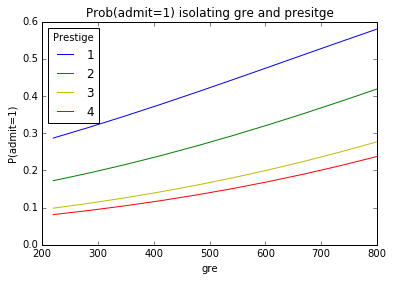

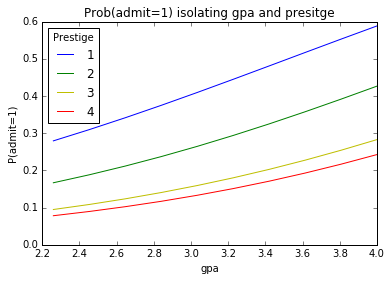

In [48]:
def isolate_and_plot(variable):
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                            aggfunc=np.mean)

    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and presitge")
    pl.show()


isolate_and_plot('gre')
isolate_and_plot('gpa')


### Brute force solution
In case it's helpful to see it broken down more

In [62]:
p1 = combos[combos["prestige"]==1]
p2 = combos[combos["prestige"]==2]
p3 = combos[combos["prestige"]==3]
p4 = combos[combos["prestige"]==4]

In [73]:
p1_gpa = pd.pivot_table(p1,index = ["gpa"], values=["admit_pred"], aggfunc=np.mean)
p2_gpa = pd.pivot_table(p2,index = ["gpa"], values=["admit_pred"], aggfunc=np.mean)
p3_gpa = pd.pivot_table(p3,index = ["gpa"], values=["admit_pred"], aggfunc=np.mean)
p4_gpa = pd.pivot_table(p4,index = ["gpa"], values=["admit_pred"], aggfunc=np.mean)

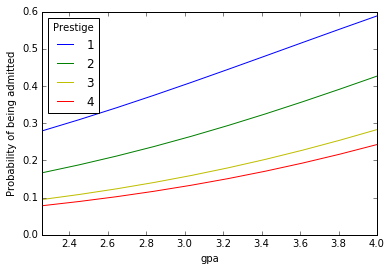

In [83]:
fig, ax = plt.subplots()
p1_gpa.plot(ax=ax, c="b")
p2_gpa.plot(ax=ax, c="g")
p3_gpa.plot(ax=ax, c="y")
p4_gpa.plot(ax=ax, c="r")
ax.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
ax.set_ylabel("Probability of being admitted")

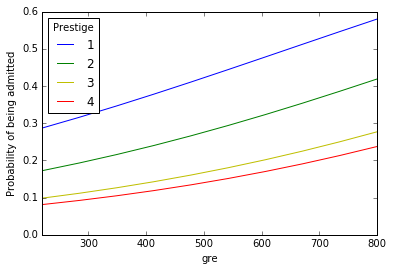

In [85]:
p1_gre = pd.pivot_table(p1,index = ["gre"], values=["admit_pred"], aggfunc=np.mean)
p2_gre = pd.pivot_table(p2,index = ["gre"], values=["admit_pred"], aggfunc=np.mean)
p3_gre = pd.pivot_table(p3,index = ["gre"], values=["admit_pred"], aggfunc=np.mean)
p4_gre = pd.pivot_table(p4,index = ["gre"], values=["admit_pred"], aggfunc=np.mean)
fig, ax = plt.subplots()
p1_gre.plot(ax=ax, c="b")
p2_gre.plot(ax=ax, c="g")
p3_gre.plot(ax=ax, c="y")
p4_gre.plot(ax=ax, c="r")
ax.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
ax.set_ylabel("Probability of being admitted")

### Note if you used sklearn for the logistic regression
You might have noticed, it is giving different coefficients to the example in the solution code which uses statsmodel.  The reason is that sklearn uses regularization by default (l2, and c=1... if you look at the documentation, you can see this).  If you wanted to tie out fairly closely with the statsmodel results, you could set C=10000000 (i.e. a large number), which effectively removes the penalty.  Statsmodel has no penalty by default.<br>
Also, if you want to generate predicted probabilities with sklearn, rather than actual predictions, you can use .predict_proba()